In [2]:
%matplotlib inline
import weak_sauce as ws
import weak_sauce.data_tools
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
from weak_sauce.movers import UniformGaussianMover
from weak_sauce.grid import MoveableGrid
from weak_sauce.sources import Source
from weak_sauce.movers import UniformIlluminationMover
from weak_sauce.fit_flat import FlatFitter
import pandas as pd

In [2]:
data_mg = MoveableGrid('gaussian_test4')
val_mg = MoveableGrid('/nfs/slac/g/ki/ki19/lsst/mbaumer/ccd_mg_model_fits/validation_gaussian_synthetic4_lsst_amp03_maxit100000_step0.1_decay0.0_perturb0.0/mg.pkl')
ideal_grid = Source(num_x=243,num_y=1723)

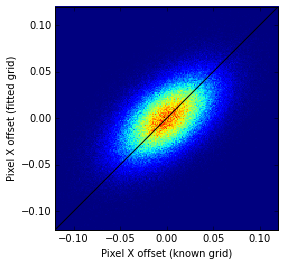

In [3]:
plt.figure(figsize=(4,4))
ideal_grid = Source(num_x=243,num_y=1723)
_ = plt.hist2d((data_mg.source.vertices[:,:,0]-ideal_grid.vertices[:,:,0]).flatten(),
               (val_mg.source.vertices[:,:,1].T-ideal_grid.vertices[:,:,0]).flatten(),bins=200,range=[(-.12,.12),(-.12,.12)])
plt.plot([-.12,.12],[-.12,.12],'k')
plt.xlabel('Pixel X offset (known grid)')
plt.ylabel('Pixel X offset (fitted grid)')

In [3]:
known = pd.read_pickle('/nfs/slac/g/ki/ki19/lsst/mbaumer/scienceImpactDFs/for_paper/val_known_grid1474624229.97.pkl')
fitted = pd.read_pickle('/nfs/slac/g/ki/ki19/lsst/mbaumer/scienceImpactDFs/for_paper/val_fitted_grid1474624243.89.pkl')
data = pd.concat([known['Mx'],known['My'],fitted['Mx'],fitted['My']],axis=1).dropna()
data.columns = ['kMx','kMy','fMx','fMy']

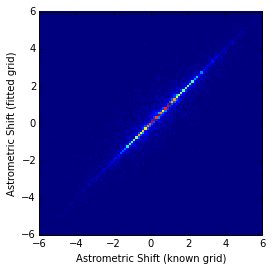

In [5]:
plt.figure(figsize=(4,4))
cts, _,_,_ = plt.hist2d(data['kMx'],data['fMy'],range=[(-6,6),(-6,6)],bins=100);
plt.xlabel('Astrometric Shift (known grid)')
plt.ylabel('Astrometric Shift (fitted grid)')

In [6]:
import matplotlib
matplotlib.rcParams.update({'font.size': 24})

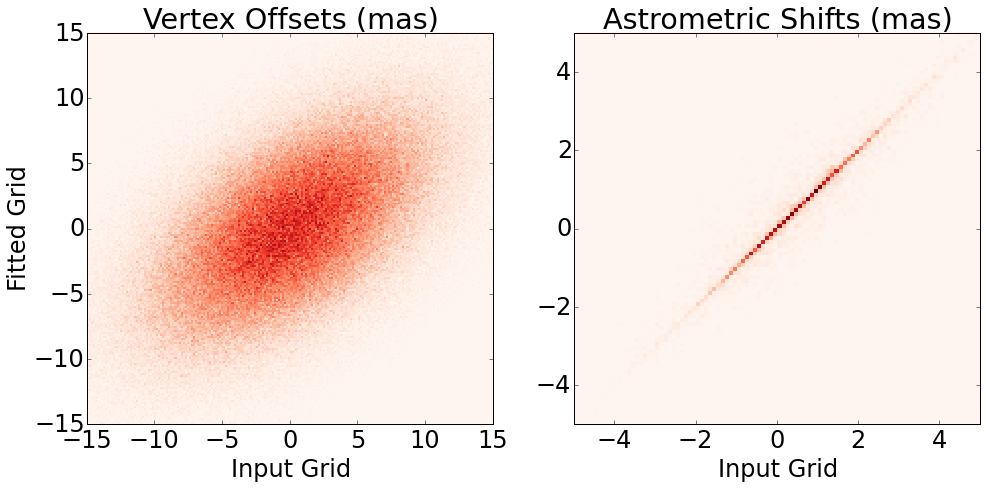

In [19]:
fig,axarr = plt.subplots(1,2,figsize=(16,7))
ideal_grid = Source(num_x=243,num_y=1723)
_,_,_,im1 = axarr[0].hist2d((data_mg.source.vertices[:,:,0]-ideal_grid.vertices[:,:,0]).flatten()*200,
               (val_mg.source.vertices[:,:,1].T-ideal_grid.vertices[:,:,0]).flatten()*200,bins=200,range=[(-15,15),(-15,15)],cmap='Reds',normed=True)
#axarr[0].plot([-.12,.12],[-.12,.12],color='k',linestyle='--')
axarr[0].set_xlabel('Input Grid')
axarr[0].set_ylabel('Fitted Grid')
axarr[0].set_title('Vertex Offsets (mas)')
cts, _,_,im = axarr[1].hist2d(data['kMx'],data['fMy'],range=[(-5,5),(-5,5)],bins=100,cmap='Reds',normed=True);
axarr[1].set_xlabel('Input Grid')
#axarr[1].set_ylabel('Fitted Grid')
axarr[1].set_title('Astrometric Shifts (mas)')
#plt.tight_layout()
#axarr[1].plot([-6,6],[-6,6],color='k',linestyle='--')
#axarr[1].set_ylabel('Astrometric Shift (fitted grid)')

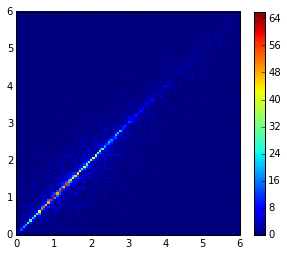

In [27]:
plt.figure(figsize=(5,4))
testx = np.sqrt(data['kMx']**2+data['kMy']**2)
testy = np.sqrt(data['fMx']**2+data['fMy']**2)
cts, _,_,_ = plt.hist2d(testx,testy,range=[(0,6),(0,6)],bins=100);
plt.colorbar();